<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind, f_oneway, pearsonr

<ipython-input-2-0f37fcbd782c>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


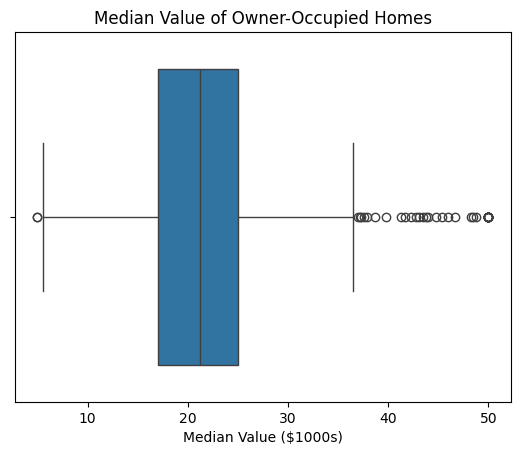

In [6]:
#For the "Median value of owner-occupied homes" provide a boxplot

sns.boxplot(x=boston_df['MEDV'])
plt.title('Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value ($1000s)')
plt.show()

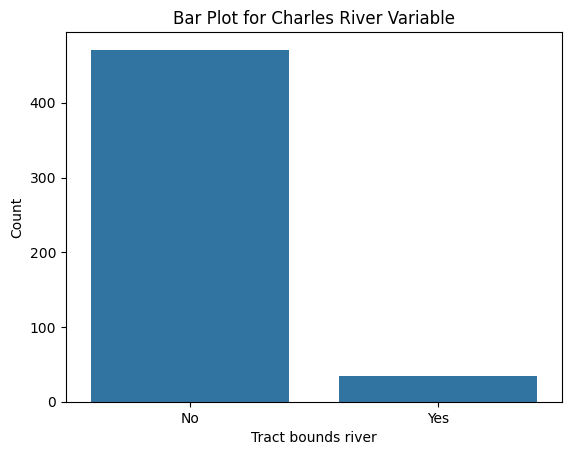

In [7]:
#Provide a bar plot for the Charles river variable

sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot for Charles River Variable')
plt.xlabel("Tract bounds river")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Count')
plt.show()

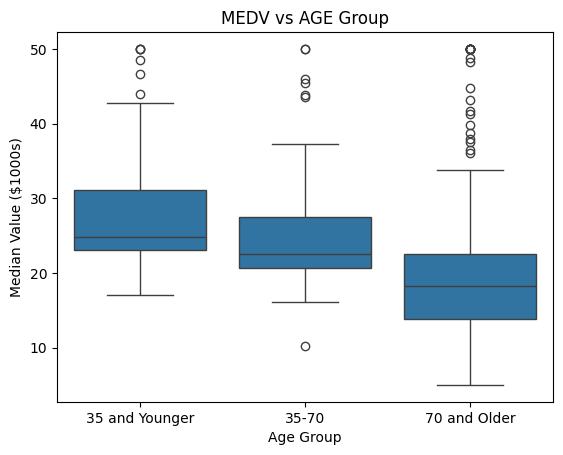

In [8]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and Younger', '35-70', '70 and Older'])

sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('MEDV vs AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

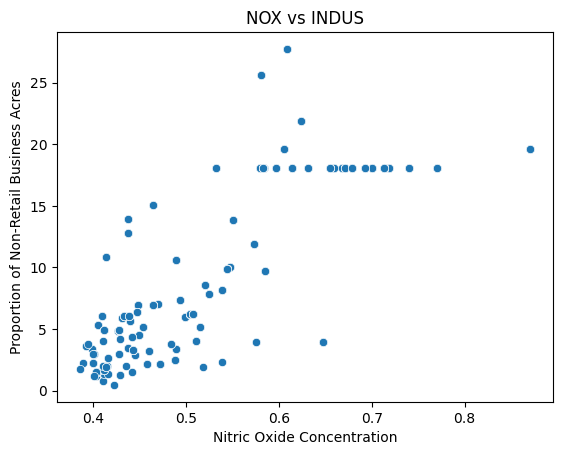

Higher proportion of non-retail business acres show higher nitric oxide concentration


In [9]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()
print('Higher proportion of non-retail business acres show higher nitric oxide concentration')

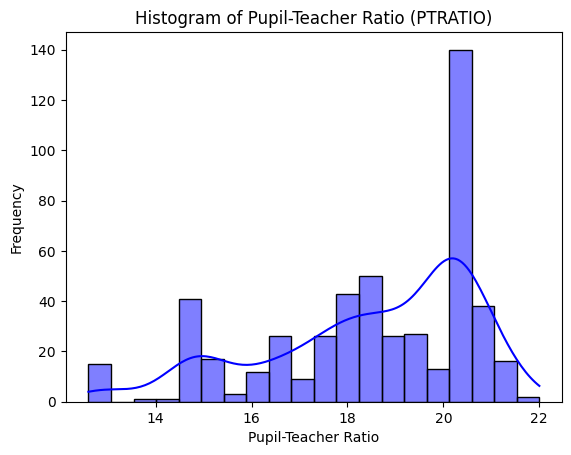

In [10]:
#Create a histogram for the pupil to teacher ratio variable

sns.histplot(boston_df['PTRATIO'], kde=True, bins=20, color='blue')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(chas_1, chas_0)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV between CHAS = 1 and CHAS = 0.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV between CHAS = 1 and CHAS = 0.")



T-statistic: 3.996, P-value: 0.000
Reject the null hypothesis: There is a significant difference in MEDV between CHAS = 1 and CHAS = 0.


In [12]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

group_1 = boston_df[boston_df['AGE_group'] == '35 and Younger']['MEDV']
group_2 = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
group_3 = boston_df[boston_df['AGE_group'] == '70 and Older']['MEDV']

f_stat, p_value = f_oneway(group_1, group_2, group_3)

print(f"F-statistic: {f_stat:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: At least one age group has a significantly different MEDV.")
else:
    print("Fail to reject the null hypothesis: No significant difference in MEDV across age groups.")


F-statistic: 36.408, P-value: 0.000
Reject the null hypothesis: At least one age group has a significantly different MEDV.


In [13]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {corr_coeff:.3f}, P-value: {p_value:.3f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.764, P-value: 0.000
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


In [14]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

if model.pvalues[1] < 0.05:
    print("Reject the null hypothesis: DIS has a significant impact on MEDV.")
else:
    print("Fail to reject the null hypothesis: DIS has no significant impact on MEDV.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        09:56:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

<ipython-input-14-6ad4f58063c0>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if model.pvalues[1] < 0.05:


Reject the null hypothesis: DIS has a significant impact on MEDV.
